<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## **Statistical Analysis and Visualization for Marketing**


Estimated time needed: **1** hour


## Abstract


This lab is dedicated to loading, pre-preparation, basic statistical analysis and visualization in marketing based on personal anonymized customer data and the sales impact of marketing companies. The goal is to determine the impact of marketing campaigns on different groups of customer.


## Introduction


The main problem to be solved in this lab is the download, preparation and statistical analysis including visualization of a dataset. 

The basic difficulty of statistical analysis of real data is that it is prepared or presented in a form that is not convenient for machine learning methods or require additional information that needs to be calculated and added to the dataset. Therefore, this lab shows methods of automatic preparation of real data for such cases. The other problem is the ability to competently manipulate and transform big data in order to obtain a statistical report both in tabular form and in the form of graphs.


## Materials and methods


In this lab, we will learn how to download data, prepare it for processing, perform basic statistical analysis and visualize the outcomes.
This lab consist of the following steps:
* Data download - download and display data from a file
* Data preparation - preliminary analysis of data structure, change of data and table structure
* Statistical analysis - basic statistical analysis
* Data visualization - use variety of graphs to present the output of analysis


Data set used in this was obtained from the https://www.kaggle.com/datasets/jackdaoud/marketing-data. This dataset released under CC0: Public Domain license that allow of copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. 


## Prerequisites
* [Python](https://www.python.org) - basic level
* [Pandas](https://pandas.pydata.org) - basic level 
* [Matplotlib](https://matplotlib.org) - basic level
* [seaborn](https://seaborn.pydata.org) - middle level
* Statistics - basic level


## Objectives


After completing this lab, you will be able to:


* Load a data set from a csv file
* Perform basic analysis of data
* Create new columns and change existing column types
* Transform the table
* Visualize data with popular Python data visualization libraries such as seaborn and matplotlib
* Calculate basic statistics
     * Minimum and maximum value
     * Average
     * Quarters
* Create pivot tables


## Import Libraries/Define Auxiliary Functions


**Running outside Skills Network Labs.** This notebook was tested within Skills Network Labs. Running in another environment should work as well, but is not guaranteed and may require different setup routine.


Libraries such as Pandas, MatplotLib and SeaBorn should be installed.


In [2]:
conda install -c conda-forge pandas

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    openssl-1.1.1w             |       hd590300_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The foll

In [3]:
conda install -c conda-forge matplotlib

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.5.3           |   py37h89c1867_2           7 KB  conda-forge
    pyqt-5.12.3                |   py37h8685d9f_4         6.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

  matplotlib         conda-forge/linux-64::matplotlib-3.5.3-py37h89c1867_2

In [4]:
conda install -c conda-forge seaborn 

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.5                |     pyhd8ed1ab_0         183 KB  conda-forge
    seaborn-0.12.2             |       hd8ed1ab_0           6 KB  conda-forge
    seaborn-base-0.12.2        |     pyhd8ed1ab_0         226 KB  conda-forge
    statsmodels-0.13.5         |   py37h7deecbd_1        10.0 MB
    ------------------------------------------------------------
                                           Tota

## Load data from a .csv file


Some libraries should be imported before you can begin.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

To keep distractions to a minimum, let's disable warnings by using **[warnings.filterwarnings()](https://docs.python.org/3/library/warnings.html)**


In [6]:
import warnings
warnings.filterwarnings('ignore')

We are going to use pandas Python library for initial data exploration and data analysis. Specifically we are going to use pandas DataFrame to hold our data set. So, our next step is to load the data into a pandas Data Frame from a csv file using **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**

But first, let's set the value of the precision parameter to 2 so that pandas displays two decimal digits (instead of 6 as default) by using **[pandas.set_option()](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html)**  and  **[pd.options.display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)**.


In [7]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0SL1EN/marketing_campaign.csv', sep=";")

Now let's look at our data set in the pandas DataFrame.


In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data exploration and preparation


Let's study our data set as displayed by the DataFrame. As you can see the data set consist of 2240 rows and 29 columns containing information of different data types. We should make sure that Python recognized data types the right way. To do this we will use **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data include year of birth, education, marital status of the customer, as well as various marketing information, including:

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise 
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase


Let's study the data in various DataFrame columns. 


As can be seen from the previous information, the Income column contains the missing data (2240 - 2216 = 24 NaN values). You can either delete the rows that contain this information (**[pandas.DataFrame.dropna ()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**), or fill in these cells by the value "0" (**[pandas.DataFrame.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)**).


In [10]:
df.Income = df.Income.fillna(0)

Let's create list of Educational types in this dataset using by: **[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)** and show results in table **[pandas.Series.to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)**


In [11]:
df['Education'].value_counts().to_frame()

,Education
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


You can see that there are customers with 5 different types of education in this dataset


Similarly determine how many Marital Status there are in this dataset

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [12]:
df['Marital_Status'].value_counts().to_frame() ##YOUR CODE GOES HERE##

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


As you can see there are 8 types of maritial status.


Let's obtain information about types of  marital status used by: **[pandas.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)**. These list must be ordered for simplify analysis (**[list.sort()](https://docs.python.org/3/howto/sorting.html)**)


In [13]:
u = list(df['Marital_Status'].unique())
u.sort()
u

['Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO']

As you can see, the above columns have a limited set of values, so for correct analysis, change their type to categorical.

In addition, the customer registration date is also defined as an object type. Therefore we transform this column to the DataTime format.


In [14]:
df[['Education','Marital_Status']] = df[['Education','Marital_Status']].astype('category')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df[['Education','Marital_Status', 'Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2240 non-null   category      
 1   Marital_Status  2240 non-null   category      
 2   Dt_Customer     2240 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1)
memory usage: 22.6 KB


## Basic Statistical analisys ##


Let's calculate basic statistics using **[pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)**.


In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,51687.46,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25609.34,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,34722.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51075.00,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


This method allows you to get information about the total number of records, their average values, standard deviation, minimum and maximum values and main quartiles. This information is only available for numerical columns. To obtain statistical information for other types of columns, it is necessary to specify this in the corresponding attributes of the function. For example, to obtain statistical information for categorical columns you need:


In [16]:
df.describe(include='category')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


As you can see, other statistical information is calculated for category fields, in particular: total number of records, number of unique values, most popular value, and its frequency.


You can see that the most active customers are married people with secondary education.


Let's determine the percentage of customers by type of education:


To do this, we need to change the format of float values by adding "%" to the end of the number, as well as normalize the values in the value_counts() function and multiply their result by 100.


In [17]:
pd.options.display.float_format = '{:.1f}%'.format
ed = df['Education'].value_counts(normalize=True)*100
ed

Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: Education, dtype: float64

As you can see, the most active customers are people with secondary education, then - PhDs, and people with a master's degree.


Let's study the distribution of people in terms of marital status and education. To do this, we can use the function: **[pandas.crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)**


In [18]:
pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0%,0.0%,1.0%,3.6%,1.7%,2.5%,0.2%,0.0%
Basic,0.0%,0.0%,0.0%,0.9%,0.8%,0.6%,0.0%,0.0%
Graduation,0.0%,0.0%,5.3%,19.3%,11.2%,12.8%,1.6%,0.0%
Master,0.0%,0.0%,1.7%,6.2%,3.3%,4.7%,0.5%,0.0%
PhD,0.0%,0.0%,2.3%,8.6%,4.4%,5.2%,1.1%,0.1%


For easy analysis, visualize this table using the function: **[seaborn.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)**


<AxesSubplot:xlabel='Marital_Status', ylabel='Education'>

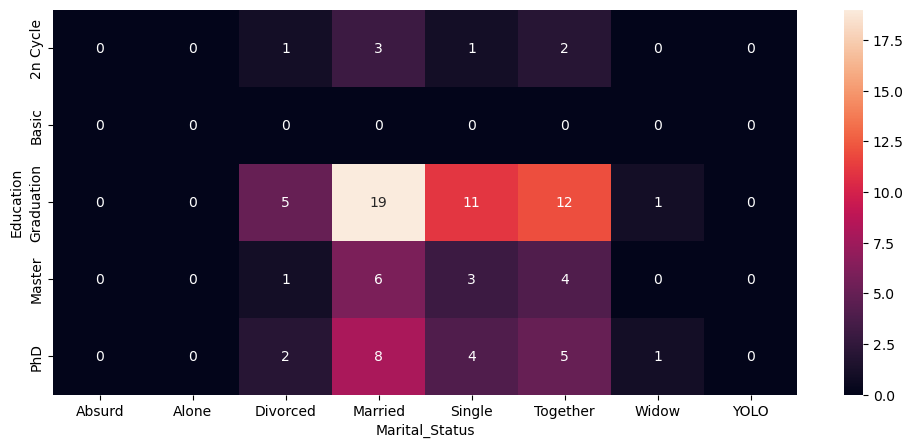

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d")

As you can see, married (officially or informally) and single customers with secondary education consists the largest percentage of persons. The next in percentage terms are PhDs and people with a master's degree. It can also be seen that  people with the specified marital status are the most active customers.


Let's analyze the impact of the first marketing campaign on the number of purchases depending on the type of education.


In [20]:
pd.crosstab(df['Education'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,Total
Education,,,
2n Cycle,8.4%,0.6%,9.1%
Basic,2.4%,0.0%,2.4%
Graduation,46.7%,3.7%,50.3%
Master,15.7%,0.8%,16.5%
PhD,20.4%,1.3%,21.7%
Total,93.6%,6.4%,100.0%


As you can see, the first marketing campaign attracted people with secondary education the most. The next are PhDs and masters. It should be noted that there are hundreds of times more people with secondary education than PhDs and masters. The difference in number is about 2-3 times here. This may indicate that the marketing campaign is aimed at highly intelligent people.

In addition, it can be seen that this company attracted only 6.4% of customers.


Let's similarly analyze how people of different marital status reacted to the marketing campaign.


In [23]:
pd.crosstab(df['Marital_Status'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total")*100

AcceptedCmp1,0,1,Total
Marital_Status,,,
Absurd,0.0%,0.0%,0.1%
Alone,0.1%,0.0%,0.1%
Divorced,9.8%,0.5%,10.4%
Married,35.8%,2.8%,38.6%
Single,20.0%,1.4%,21.4%
Together,24.5%,1.4%,25.9%
Widow,3.2%,0.2%,3.4%
YOLO,0.1%,0.0%,0.1%
Total,93.6%,6.4%,100.0%


It is clearly see that married people reacted the most to the first campaign.


Let's investigate the impact of the first marketing company on the number of sales depedence on education and marital status. To do this, use **[pandas.pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)**


In [24]:
pd.options.display.float_format = '{:.2f}'.format
df.pivot_table(index= "Education", columns = 'Marital_Status', values = 'AcceptedCmp1', aggfunc = "sum")

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,1,8,3,1,1,0
Basic,0,0,0,0,0,0,0,0
Graduation,1,0,9,33,13,24,2,0
Master,0,0,1,9,4,2,2,0
PhD,0,0,1,13,11,5,0,0


Let's compare the influence of different marketing companies on the customers. As you can see above, everyone could buy products and respond to several marketing companies at the same time. That is, 1 record is assigned to 1 person in the data set. In order to conduct this analysis, we need to duplicate records if a person bought products at the same time through several marketing companies. First of all, let's create a separate data set of people who responded to the 1st marketing campaign. Create a separate field `AcceptedCmp` and write in it the value 1.


In [25]:
dfa1 = df[df['AcceptedCmp1']>0]
dfa1['AcceptedCmp'] = 1
dfa1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
15,2114,1946,PhD,Single,82800.00,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,3,11,1,1
18,6565,1949,Master,Married,76995.00,0,1,2013-03-28,91,1012,...,0,0,0,1,0,0,3,11,0,1
53,2225,1977,Graduation,Divorced,82582.00,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1
67,9369,1979,2n Cycle,Single,88194.00,0,1,2014-03-19,19,688,...,1,0,0,1,0,0,3,11,1,1
87,4452,1957,Graduation,Single,50388.00,0,1,2014-05-28,3,292,...,0,1,0,1,0,0,3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.00,0,0,2013-12-23,91,675,...,1,0,1,1,0,0,3,11,0,1
2174,2829,1955,Graduation,Married,65210.00,0,1,2014-03-10,25,626,...,0,1,0,1,0,0,3,11,0,1
2175,1772,1975,PhD,Married,79174.00,0,0,2013-01-11,2,1074,...,0,0,1,1,0,0,3,11,1,1
2193,8722,1957,2n Cycle,Married,82347.00,0,0,2012-11-06,38,556,...,1,0,0,1,0,0,3,11,1,1


Do the same for all other campaigns


In [26]:
dfa2 = df[df['AcceptedCmp2']>0]
dfa2['AcceptedCmp'] = 2
##YOUR CODE GOES HERE##
dfa3 = df[df['AcceptedCmp3']>0]
dfa3['AcceptedCmp'] = 3
dfa4 = df[df['AcceptedCmp4']>0]
dfa4['AcceptedCmp'] = 4
dfa5 = df[df['AcceptedCmp5']>0]
dfa5['AcceptedCmp'] = 5

Let's combine the received datasets into one.


In [27]:
dfa = dfa1.append(dfa2)
dfa = dfa.append(dfa3)
dfa = dfa.append(dfa4)
dfa = dfa.append(dfa5)
dfa

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
15,2114,1946,PhD,Single,82800.00,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,3,11,1,1
18,6565,1949,Master,Married,76995.00,0,1,2013-03-28,91,1012,...,0,0,0,1,0,0,3,11,0,1
53,2225,1977,Graduation,Divorced,82582.00,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1
67,9369,1979,2n Cycle,Single,88194.00,0,1,2014-03-19,19,688,...,1,0,0,1,0,0,3,11,1,1
87,4452,1957,Graduation,Single,50388.00,0,1,2014-05-28,3,292,...,0,1,0,1,0,0,3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.00,0,0,2013-12-23,91,675,...,1,0,1,1,0,0,3,11,0,5
2171,3968,1970,2n Cycle,Divorced,65706.00,0,0,2013-06-28,77,918,...,0,1,1,0,1,0,3,11,1,5
2175,1772,1975,PhD,Married,79174.00,0,0,2013-01-11,2,1074,...,0,0,1,1,0,0,3,11,1,5
2187,5721,1956,PhD,Married,84117.00,0,0,2014-05-11,60,611,...,0,0,1,0,0,0,3,11,0,5


Let's group and analyze campaigns:


In [28]:
df_p = pd.pivot_table(dfa, values='ID', index=['AcceptedCmp','Education'],
               columns=['Marital_Status'], aggfunc="count", fill_value=0, margins=True, margins_name="Total")
df_p

Marital_Status          Absurd  Alone  Divorced  Married  Single  Together  \
AcceptedCmp Education                                                        
1           2n Cycle         0      0         1        8       3         1   
            Basic            0      0         0        0       0         0   
            Graduation       1      0         9       33      13        24   
            Master           0      0         1        9       4         2   
            PhD              0      0         1       13      11         5   
2           2n Cycle         0      0         2        0       0         0   
            Basic            0      0         0        0       0         0   
            Graduation       0      0         2        4       3         7   
            Master           0      0         0        0       1         1   
            PhD              0      0         1        3       1         4   
3           2n Cycle         0      0         0        8       4         3   
            Basic            0      0         0        2       0         4   
            Graduation       0      0        12       28      23        12   
            Master           0      0         0       13       5         6   
            PhD              0      1         8       12       6        12   
4           2n Cycle         0      0         3        1       2         4   
            Basic            0      0         0        0       0         0   
            Graduation       0      0         8       30      17        22   
            Master           0      0         2       11       8         7   
            PhD              0      0         5       21       6        10   
5           2n Cycle         0      0         3        4       1         2   
            Basic            0      0         0        0       0         0   
            Graduation       1      0         8       31      15        29   
            Master           0      0         0       10       8         7   
            PhD              0      0         2       21       7         6   
Total                        2      1        68      262     138       168   

Marital_Status          Widow  YOLO  Total  
AcceptedCmp Education                       
1           2n Cycle        1     0  14.00  
            Basic           0     0    NaN  
            Graduation      2     0  82.00  
            Master          2     0  18.00  
            PhD             0     0  30.00  
2           2n Cycle        0     0   2.00  
            Basic           0     0    NaN  
            Graduation      0     0  16.00  
            Master          0     0   2.00  
            PhD             1     0  10.00  
3           2n Cycle        0     0  15.00  
            Basic           0     0   6.00  
            Graduation      3     0  78.00  
            Master          0     0  24.00  
            PhD             1     0  40.00  
4           2n Cycle        0     0  10.00  
            Basic           0     0    NaN  
            Graduation      4     0  81.00  
            Master          3     0  31.00  
            PhD             3     0  45.00  
5           2n Cycle        0     0  10.00  
            Basic           0     0    NaN  
            Graduation      2     0  86.00  
            Master          3     0  28.00  
            PhD             3     0  39.00  
Total                      28     0 667.00

This table contains all the necessary data to compare the effectiveness of marketing campaigns.

Let's calculate the percentage of sales caused by different marketing cаmpanies:


In [29]:
dfa['AcceptedCmp'].value_counts(normalize=True).sort_index()

1   0.22
2   0.04
3   0.24
4   0.25
5   0.24
Name: AcceptedCmp, dtype: float64

As can be seen from the table, the most successful were 1, 3, 4 and 5 marketing campaigns. Their effectiveness is about the same level. The results of the second are almost absent.
Let's take the results of the first campaign as a benchmark and compare how different the results of other advertising campaigns are relative to it to compare the effectiveness of a campaign.

To do this, based on `df_p` delete the last column `Total`, and create an index by the field` Education`.


In [30]:
d = df_p.reset_index()
d = d[d.columns[:-1]]
d = d.set_index('Education')
d

Marital_Status,AcceptedCmp,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,,
2n Cycle,1,0,0,1,8,3,1,1,0
Basic,1,0,0,0,0,0,0,0,0
Graduation,1,1,0,9,33,13,24,2,0
Master,1,0,0,1,9,4,2,2,0
PhD,1,0,0,1,13,11,5,0,0
2n Cycle,2,0,0,2,0,0,0,0,0
Basic,2,0,0,0,0,0,0,0,0
Graduation,2,0,0,2,4,3,7,0,0
Master,2,0,0,0,0,1,1,0,0


Calculate the difference between the campaigns and group the data again.


In [31]:
df_dif = pd.DataFrame()
for a in range(2,6):
    df_dif = df_dif.append(d[d['AcceptedCmp']==a]-d[d['AcceptedCmp']==1])
df_dif['AcceptedCmp'] = df_dif['AcceptedCmp'] + 1
df_dif.groupby(['AcceptedCmp', 'Education' ],).sum()
                             

Marital_Status          Absurd  Alone  Divorced  Married  Single  Together  \
AcceptedCmp Education                                                        
2           2n Cycle         0      0         1       -8      -3        -1   
            Basic            0      0         0        0       0         0   
            Graduation      -1      0        -7      -29     -10       -17   
            Master           0      0        -1       -9      -3        -1   
            PhD              0      0         0      -10     -10        -1   
3           2n Cycle         0      0        -1        0       1         2   
            Basic            0      0         0        2       0         4   
            Graduation      -1      0         3       -5      10       -12   
            Master           0      0        -1        4       1         4   
            PhD              0      1         7       -1      -5         7   
4           2n Cycle         0      0         2       -7      -1         3   
            Basic            0      0         0        0       0         0   
            Graduation      -1      0        -1       -3       4        -2   
            Master           0      0         1        2       4         5   
            PhD              0      0         4        8      -5         5   
5           2n Cycle         0      0         2       -4      -2         1   
            Basic            0      0         0        0       0         0   
            Graduation       0      0        -1       -2       2         5   
            Master           0      0        -1        1       4         5   
            PhD              0      0         1        8      -4         1   

Marital_Status          Widow  YOLO  
AcceptedCmp Education                
2           2n Cycle       -1     0  
            Basic           0     0  
            Graduation     -2     0  
            Master         -2     0  
            PhD             1     0  
3           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      1     0  
            Master         -2     0  
            PhD             1     0  
4           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      2     0  
            Master          1     0  
            PhD             3     0  
5           2n Cycle       -1     0  
            Basic           0     0  
            Graduation      0     0  
            Master          1     0  
            PhD             3     0

As you can see from the table, the 2nd campaign contains mostly negative values. This confirms its inefficiency. It can be seen that the 5th, 4th and 3rd companies had the greatest influence on PhDs. In particular, the 3rd company proved to be the most effective for divorced PhDs. And the 5th for married PhDs. The impact on people with secondary education was only in the 3rd campaign.


It is important to analyze the impact of marketing campaigns on different age groups.
The data set contains only the year of birth of the customers. Therefore, we calculate their age and group them into age categories.


In [32]:
now = pd.Timestamp('now').year
age = now-dfa.Year_Birth
age

15      77
18      74
53      46
67      44
87      66
        ..
2168    39
2171    53
2175    48
2187    67
2221    41
Name: Year_Birth, Length: 667, dtype: int64

To create a field containing age groups, we will use the functions: **[pandas.IntervalIndex.from_tuples()](https://pandas.pydata.org/docs/reference/api/pandas.IntervalIndex.from_tuples.html?highlight=intervalindex%20from_tuples#pandas.IntervalIndex.from_tuples)** and **[pandas.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html?highlight=cut#pandas.cut())**


In [33]:
bins = pd.IntervalIndex.from_tuples([(17, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
dfa['Age'] = pd.cut(age, bins)
dfa['Age']

15      (60, 100]
18      (60, 100]
53       (40, 50]
67       (40, 50]
87      (60, 100]
          ...    
2168     (30, 40]
2171     (50, 60]
2175     (40, 50]
2187    (60, 100]
2221     (40, 50]
Name: Age, Length: 667, dtype: category
Categories (5, interval[int64, right]): [(17, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

Let's analyze how many people each age group contains.


In [34]:
dfa['Age'].value_counts().to_frame()

,Age
"(60, 100]",229
"(40, 50]",164
"(50, 60]",160
"(30, 40]",103
"(17, 30]",10


As you can see, the most susceptible to marketing campaigns are the age groups from 40 to 50 years and older than 60. Also active are people from 50 to 60 years.


## Data visualization


Let's analyze the average income received by different age groups of customers. To do this, we will use the function: **[seaborn.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)**


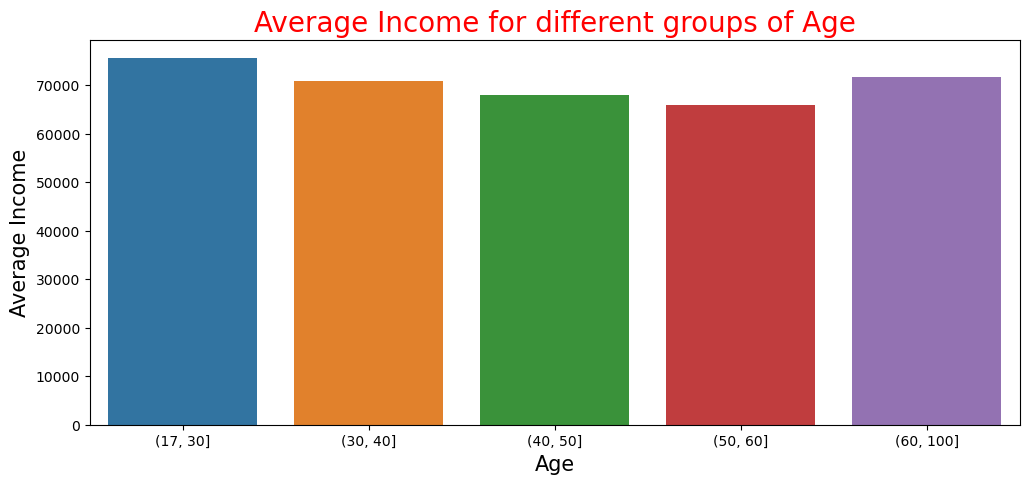

In [35]:
ageIncome = dfa.groupby(['Age'])['Income'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = ageIncome[['Age', 'Income']], x = "Age", y = "Income")
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

As you can see, young people and the elderly have the highest incomes.

Let's visualize the same data by using the function: **[seaborn.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)**

To eliminate emissions, we will display data only within (10, 90) quantiles of income values (**[pandas.DataFrame.quantile ()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)**).


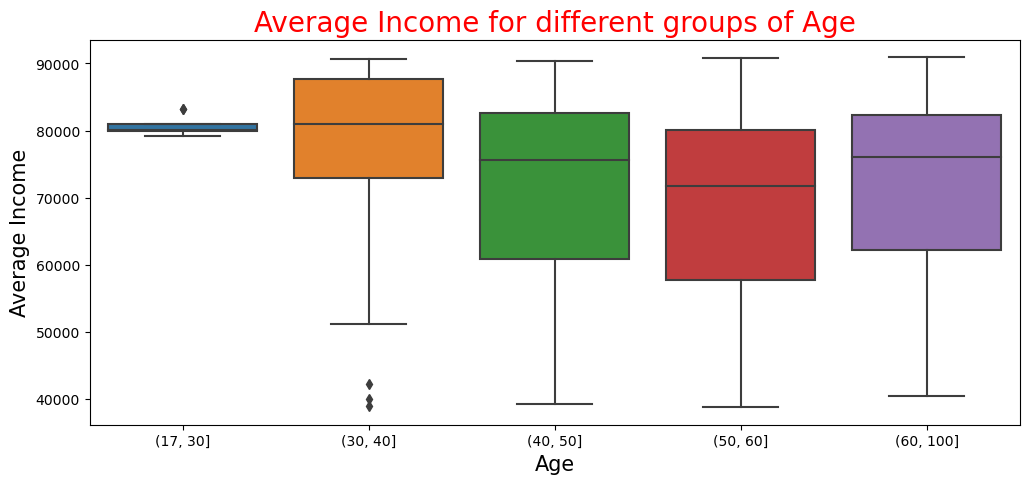

In [36]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Age", y = "Income", data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))])
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

This graph allows you to display the median of the 1st 2nd quantile, as well as the 3rd and 4th (mustache). As you can see, young people on average receive about the same income. People between the ages of 40 and 50 have the largest income disparities. The maximum income in all groups is about the same except for young people.


Let's show the distribution of income for different age groups on one graph. (**[seaborn.displot()](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)**)


<Figure size 1200x500 with 0 Axes>

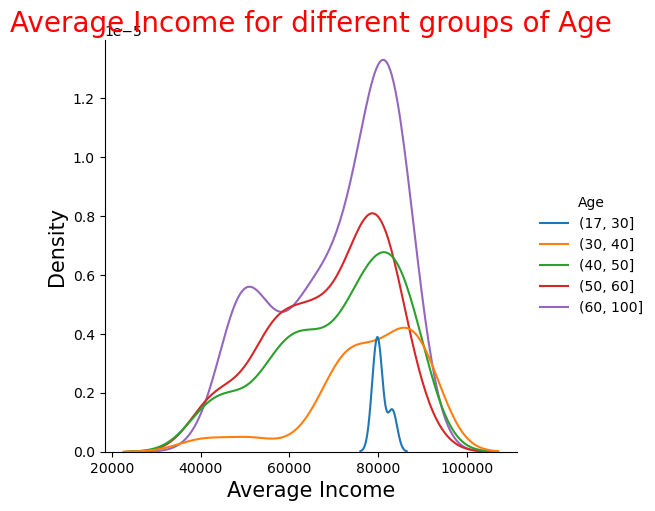

In [37]:
plt.figure(figsize=(12,5))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))].reset_index(),
            x = "Income", hue='Age', kind='kde')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

As you can see, the average income of all groups is about the same. Young people and people over 60 have the lowest income variation.


Let's compare the incomes of different groups in the form of a bar chart


<Figure size 1200x500 with 0 Axes>

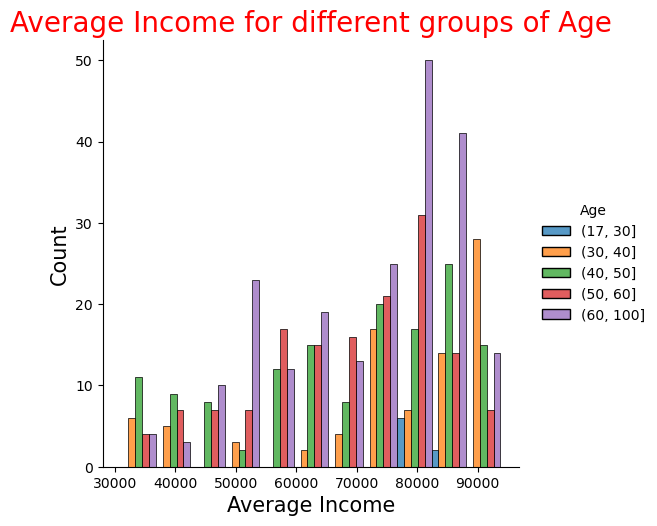

In [38]:
plt.figure(figsize=(12,5))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
            x = "Income", hue='Age', multiple='dodge')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

This graph allows you to better analyze the distribution of the number of people according to income and age groups. In particular, it can be seen that the income of more than 80,000 is received by most elderly people. The largest number of people with the lowest incomes are middle-aged people.


Let's build a pairwise comparison of income distributions in terms of education and age groups.


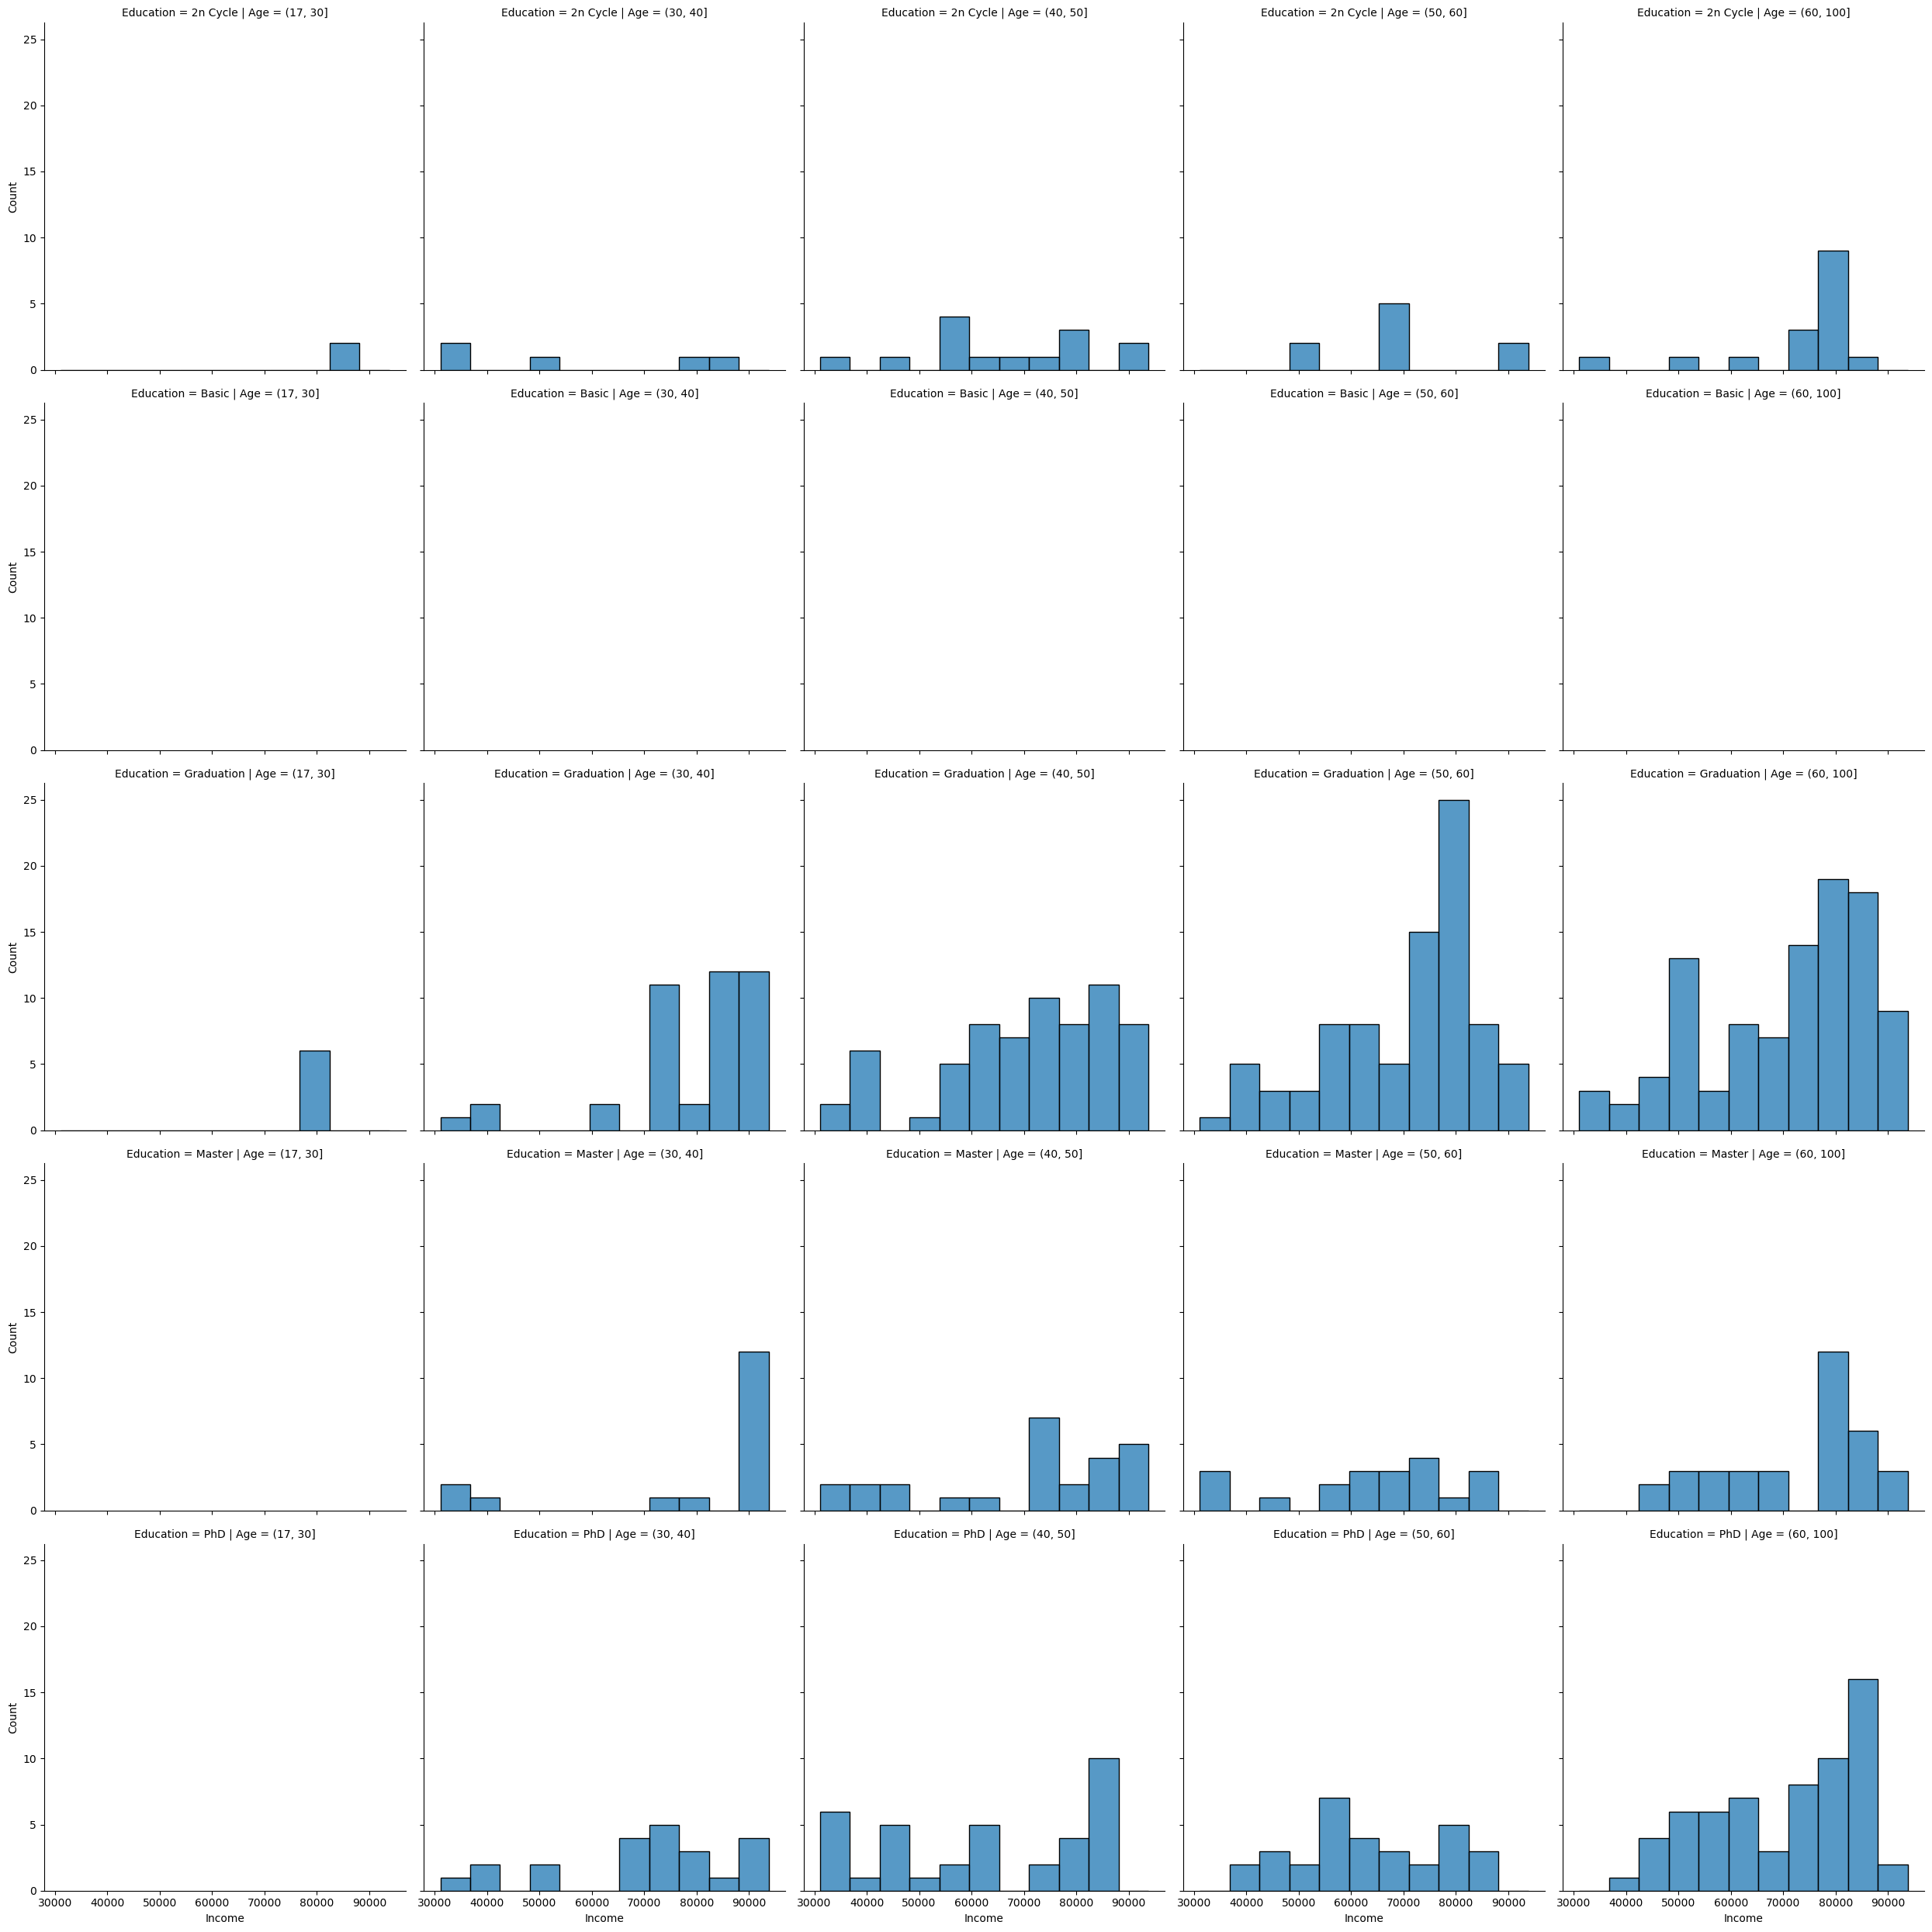

In [39]:
sns.displot(
    dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
    x="Income", col="Age", row='Education'  
)

This graph allows you to analyze the distribution of income depending on the person's education and the age group to which he belongs. In particular, the graph clearly shows that education does not affect the level of income. That is, with the same education there is a wide range of income for all age groups.


Let's plot a number of people with different education by the pie diagramm. (**[matplotlib.pyplot.pie()](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.pie.html)**)


In [ ]:
size = dfa['Education'].value_counts(normalize=True)
plt.figure(figsize=(12,5))
plt.pie(size, shadow = True, autopct = "%.2f%%", labels=size.index)
plt.title('Educational')
plt.show()

Let's compare the impact of different marketing campaigns on the purchase of goods, namely, display the column `Total` of ` df_p` data set in the form of pie charts separately for each marketing campaign.

First of all, fill the empty values of the `Total` column with zeros.


In [ ]:
df_pie = df_p.reset_index()
df_pie.Total = df_pie.Total.fillna(0)

Next, with by the loop `for` we will build pie charts of the people distribution depending on the education who bought the product as part of a particular marketing campaign. Let's separate the largest sector from the pie chart.


In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)


for e in range(1, 6):
    plt.figure(figsize=(12,5))
    dt = df_pie[df_pie['AcceptedCmp']==e]
    exp = np.zeros(len(dt))
    exp[np.argmax(dt.Total)] = 0.1

    plt.pie(dt.Total, shadow = True,   explode=exp, 
            autopct=lambda pct: func(pct, dt.Total),
            textprops=dict(color="w"))

    plt.title('AcceptedCmp ' + str(e))
    plt.legend(dt.Education, title="Education",
          loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()


These graphs allow you to visualize the pivot tables obtained in the previous section and visually display the results of the marketing campaign.


## Conclusions


As evidenced in practice, the data obtained in real field experiments is not suitable for direct statistical processing. Therefore, in this lab we learned the basic methods of downloading and preliminary data preparation. We studied how download, transform, group, recalculate and visualize data.
Unlike the well known classical approaches to statistical data analysis, Python contains many powerful libraries that allow you to manipulate data easily and quickly. Therefore, we have learned the basic methods of automating a Pandas library for pre-preparation and statistical data analysis. We also learned the basic methods of visualizing the obtained data with the MatplotLib and SeaBorn libraries which contains effective means of visual data analysis. 
This lab shows an example of marketing campaign analysis that can be easily applied to analyze all the other factors in the exist data set.


## Author


Developer: [Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
